In [1]:
%pylab inline
from datetime import date
from datetime import datetime
import os
import pandas as pd
from sklearn.neural_network import MLPRegressor

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#Funciones para crear matrices de entrenaminto y pruebas

In [2]:
def train_X_Y(dias, precios, d_inicial,num_samples,num_features):    ##d_inicial : 0 a 2508
    ##dias: vector de dia de la semana para cada dia (L=1...V=5)
    ##precios: vector de pecios para cada dia
    ##d_inicial: Primer dia del entrenamiento (0 a 2508) es num_features-1 dias antes que el primer Y de entrenamiento 
    ##num_samples: Número de muestras para entrenar 
    ##num_features: Número de parametros de entrenamiento (1+ número de dias con que se predice el precio)
    
    
    
    num_dias = num_features-1
   
    dias = dias[d_inicial+num_dias:d_inicial+num_dias+num_samples]
    dias = dias.reshape(len(dias),1)
    
    pr=precios[d_inicial:d_inicial+num_samples]
    
    for i in range(d_inicial+1,d_inicial+num_dias):
        m = precios[i:i+num_samples]
        pr =  np.column_stack((pr,m))
            
    X = np.column_stack((pr,dias))
             
    Y = precios[d_inicial+num_dias:d_inicial+num_dias+num_samples]
    
    assert (X.shape == (num_samples, num_features))
    assert (Y.shape == (num_samples,))
    
    train = {"X": X,
                "Y": Y
            }
    
    return train



def test_X_Y(dias, precios, d_inicial,num_samples,num_features):
    test = train_X_Y(dias, precios, d_inicial,num_samples,num_features)
    
    return test

In [ ]:
## Poblando datos

In [3]:
datos_csv = os.path.join( '.','COLCAP.csv')
datos_pd = pd.read_csv(datos_csv, sep = ',',
                encoding='latin-1', parse_dates =[0], infer_datetime_format= True)

In [4]:
a=datos_pd["Fecha (dd/mm/aaaa)"]

dias = []

for i in range(len(a)):
    d = a[i].weekday() + 1
    dias.append(d)
    
d = np.array(dias)

In [5]:
b = datos_pd["Valor COLCAP"]
b = np.array(b)
d
for i in range(len(b)):
    b[i] = b[i].replace(',',"")


p=np.array(b, dtype= np.float64)db

In [ ]:
## Prueba

In [38]:
#Definición de matrices de entreno
train=train_X_Y(d,p,6,2000,7)

In [40]:
#Entreno del sistema
rg = MLPRegressor(hidden_layer_sizes=(100,5), max_iter= 100000, activation="relu",shuffle= False, solver= "adam" )
rg.fit(train["X"],train["Y"])

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=False, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [43]:
#Definición de matrices de prueba
test=test_X_Y(d,p,2300,30,7)

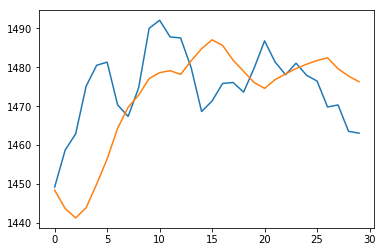

In [44]:
#Grafica de predicción y real
plt.plot(test["Y"])
plt.plot(rg.predict(test["X"]))

In [46]:
#Prueba del modelo
rg.score(test["X"], test["Y"])

-0.93748487395911417